In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

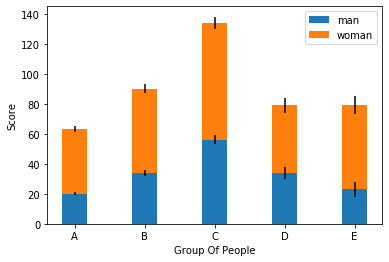

In [2]:
# stacked bar chart直方图
groups=list("ABCDE")
man_means=[20,34,56,34,23]
woman_means=[43,56,78,45,56]
man_std=[i for i in range(1,6)]
woman_std=[i for i in range(2,7)]

fig,ax=plt.subplots() # figue和子plot都建立好
ax.bar(groups,man_means,yerr=man_std,width=0.35,label="man")
ax.bar(groups,woman_means,yerr=woman_std,width=0.35,bottom=man_means,label="woman")
ax.set_ylabel("Score")
ax.set_xlabel("Group Of People")
ax.legend()
plt.show()

### Grouped ba chart with labels
+ 同组的男生并列比较
+ 把上面的使用ABCDE 做坐标图 换成使用0-5的坐标轴 

matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, \*, align='center', data=None, \*\*kwargs)   
barh(直方图位置，height=value,width=value,bottom=None,align=“center"）都是有默认传递的参数，其它通过键值赋予。width是list。

<BarContainer object of 5 artists>


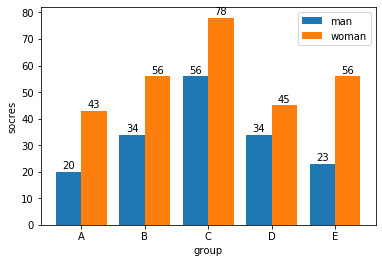

In [3]:
width=0.4
fg,ax=plt.subplots()  # 创键figure和subplot
x=np.arange(len(groups))
rect1=ax.bar(x-width/2,man_means,width,label="man")  # x起到坐标轴的作用，中心向左偏半个宽度
rect2=ax.bar(x+width/2,woman_means,width,label="woman") # rects 是一个bar容器
print(rect1)
ax.set_ylabel("socres")
ax.set_xlabel("group")

ax.set_xticks(x)
ax.set_xticklabels(groups)  # 刻度的标签设置为groups标号

ax.legend()

def auto_num(rects):
    for rect in rects:
        height=rect.get_height()
        ax.annotate(f"{height}",
                   xy=(rect.get_x()+rect.get_width()/2,height),
                   xytext=(0,3),
                    textcoords="offset points",
                    ha="center"
                   )  # 标签内容，坐标
auto_num(rect1)
auto_num(rect2)
plt.show()

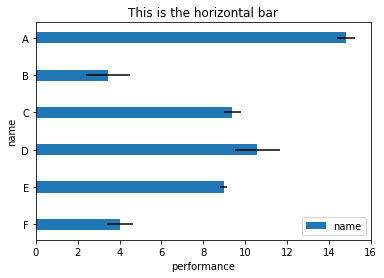

In [4]:
fig,ax=plt.subplots()
people=list("ABCDEF")
y_pos=np.arange(len(people))
performance=10*np.abs(np.random.randn(len(people)))
error=np.random.randn(len(people))

ax.barh(y_pos,width=performance,height=0.3,xerr=error,label="name")  # barh的第一个坐标为y轴

ax.set_yticks(y_pos)  # 设置刻度名 设置刻度标签
ax.set_yticklabels(people)  
ax.invert_yaxis()  # 只是设置标签反转

ax.set_xlabel("performance")  # 设置坐标的标签
ax.set_ylabel("name")
ax.set_title("This is the horizontal bar")
ax.legend()
plt.show()

### Scatter demo

In [5]:
import matplotlib.cbook as cbook


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
import pandas as pd
# Load a numpy record array from yahoo csv data with fields date, open, close,
# volume, adj_close from the mpl-data/example directory. The record array
# stores the date as an np.datetime64 with a day unit ('D') in the date column.
datafile=cbook.get_sample_data('goog.npz') 
x=np.load(datafile)["price_data"]
x.view()
    


array([('2004-08-19', 100.  , 104.06,  95.96, 100.34, 22351900, 100.34),
       ('2004-08-20', 101.01, 109.08, 100.5 , 108.31, 11428600, 108.31),
       ('2004-08-23', 110.75, 113.48, 109.05, 109.4 ,  9137200, 109.4 ),
       ...,
       ('2008-10-10', 313.16, 341.89, 310.3 , 332.  , 10597800, 332.  ),
       ('2008-10-13', 355.79, 381.95, 345.75, 381.02,  8905500, 381.02),
       ('2008-10-14', 393.53, 394.5 , 357.  , 362.71,  7784800, 362.71)],
      dtype=[('date', '<M8[D]'), ('open', '<f8'), ('high', '<f8'), ('low', '<f8'), ('close', '<f8'), ('volume', '<i8'), ('adj_close', '<f8')])

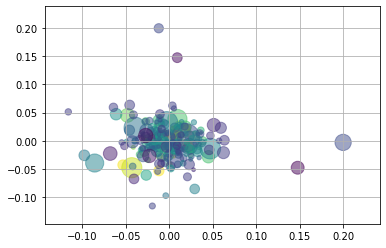

In [30]:
with cbook.get_sample_data("goog.npz") as datafile:
    price_data=np.load(datafile)["price_data"].view(np.recarray)
price_data=price_data[-250:]
delta1=np.diff(price_data.adj_close) /price_data.adj_close[:-1]

volume=(15*price_data.volume[:-2]/price_data.volume[0])**2
close=0.003*price_data.close[:-2]/0.003*price_data.open[:-2]

fig,ax=plt.subplots()
ax.scatter(delta1[:-1],delta1[1:],c=close,s=volume,alpha=0.5)
ax.grid(True)
plt.show()